In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe_list = []
namelist = ['result_default.csv','result_Flapping.csv','result_default_Atomos.csv','result_flapping_Atomos.csv']
columns = ['BasePanel','CoolingWings']
title = [
    'Experiment of default (Inside)',
    'Experiment of Flapping (Inside)',
    'Experiment of default (Outside)',
    'Experiment of Flapping (Outside)',
    'Comparison of different temperature of parts',
    'Comparison of temperature difference among parts',
    'Comparison of temperature difference with atmosphere and parts'
]
for i in range(4):
    path = 'D:/'
    path = path + namelist[i]
    data = pd.read_csv(path)
    dataframe_list.append(data[columns])
dataframe_list[0].head()

,BasePanel,CoolingWings
0,30.00,27.00
1,30.00,26.50
2,31.00,26.75
3,31.75,27.00
4,33.25,27.50


In [3]:
dataframe_list[1].head()

,BasePanel,CoolingWings
0,27.25,21.00
1,27.25,21.25
2,26.25,22.50
3,29.75,23.50
4,30.50,22.50


In [4]:
def dataprocess(dataset,columns):
    dataset['differ'] = dataset[columns[1]]-dataset[columns[0]]
    dataset['differ'].describe()
    return dataset

In [5]:
for i in dataframe_list:
    i = dataprocess(i,columns)
dataframe_list[0].head()

C:\Users\86130\AppData\Local\Temp\ipykernel_10692\2048661903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['differ'] = dataset[columns[1]]-dataset[columns[0]]


,BasePanel,CoolingWings,differ
0,30.00,27.00,-3.00
1,30.00,26.50,-3.50
2,31.00,26.75,-4.25
3,31.75,27.00,-4.75
4,33.25,27.50,-5.75


In [6]:
#inside default
dataframe_list[0]['differ'].describe()

count    90.000000
mean    -17.625000
std       5.807692
min     -24.750000
25%     -22.250000
50%     -19.500000
75%     -14.312500
max      -3.000000
Name: differ, dtype: float64

In [7]:
#inside flapping
dataframe_list[1]['differ'].describe()

count    90.000000
mean    -19.977778
std       6.047871
min     -26.000000
25%     -25.187500
50%     -22.250000
75%     -16.812500
max      -3.750000
Name: differ, dtype: float64

In [8]:
#outside default
dataframe_list[2]['differ'].describe()

count    60.000000
mean     -2.775000
std       4.623471
min     -11.000000
25%      -6.437500
50%      -2.625000
75%       0.812500
max       6.250000
Name: differ, dtype: float64

In [9]:
#outside flapping
dataframe_list[3]['differ'].describe()

count    60.000000
mean     -2.375000
std       5.618617
min      -7.750000
25%      -4.500000
50%      -2.750000
75%      -1.687500
max      37.750000
Name: differ, dtype: float64

In [10]:
import matplotlib.pyplot as plt
def ploting(epoch,dataset,columns,title,atomos = False):
    xAxis = range(epoch)
    fig = plt.figure(figsize = (15,10))
    ax1 = fig.add_subplot(111)
    ax1.plot(xAxis,dataset[columns[0]],label = columns[0])
    ax1.plot(xAxis,dataset[columns[1]],label = columns[1])
    if atomos == True:
        atomosTemp = 31
        AtomosTemp = np.ones(epoch)
        for i in range(len(AtomosTemp)):
            AtomosTemp[i] = atomosTemp
        ax1.plot(xAxis,AtomosTemp,label = 'AtomosphereTemp')
    ax2 = ax1.twinx()
    ax2.plot(xAxis,dataset['differ'],label = 'CoolingWings - BasePanel',c = 'red')
    ax1.grid()
    ax1.set_title(title)
    ax1.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right')
    ax1.set_ylabel('Temperature')
    ax2.set_ylabel('Temperature difference')
    plt.show()

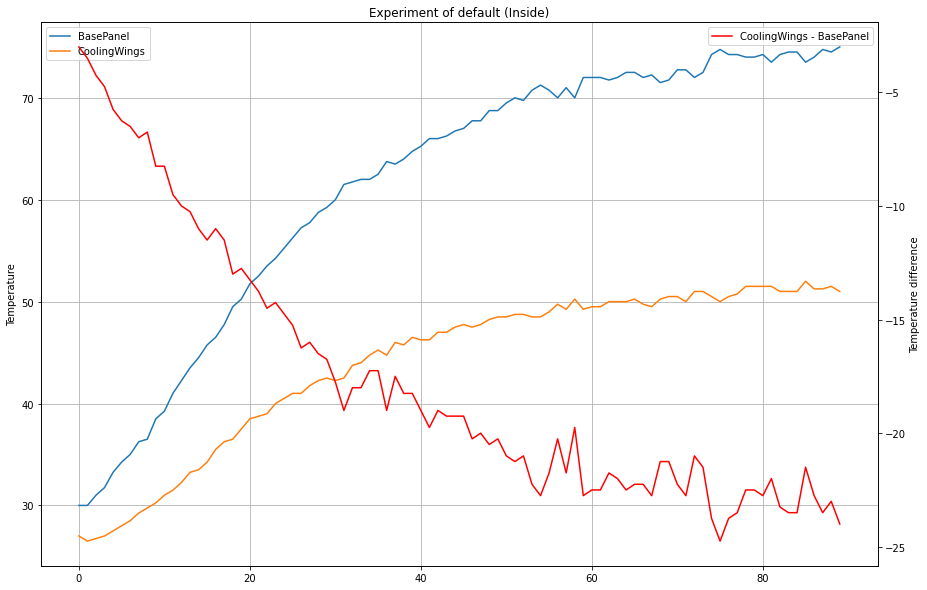

In [11]:
counting_flag = 0
ploting(90,dataframe_list[0],columns,title[counting_flag])
counting_flag += 1

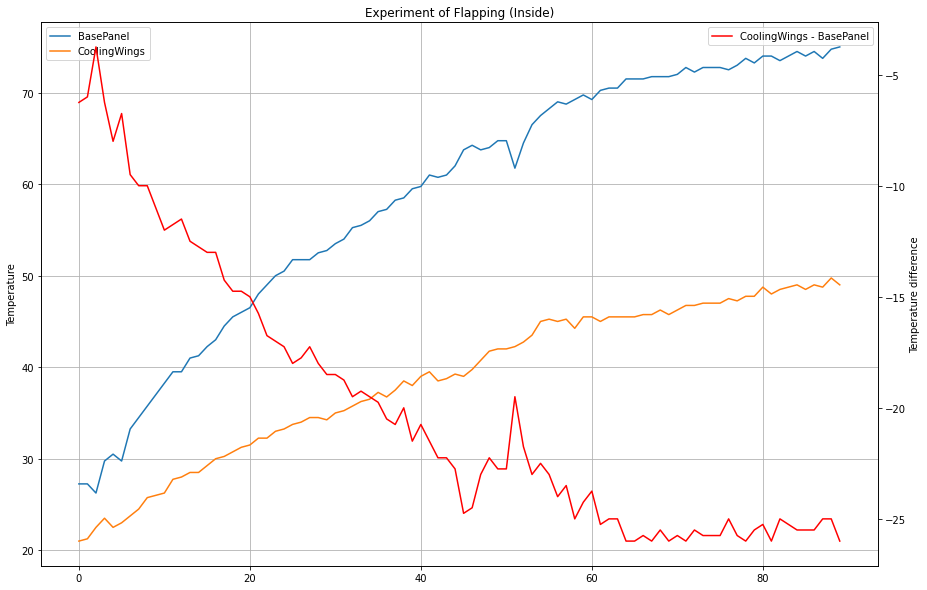

In [12]:
ploting(90,dataframe_list[1],columns,title[counting_flag])
counting_flag += 1

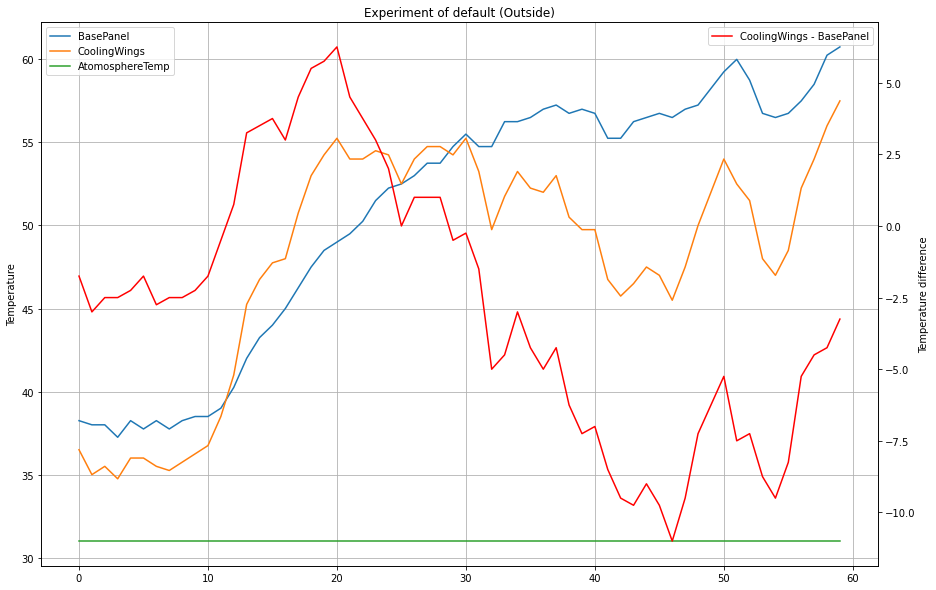

In [13]:
ploting(60,dataframe_list[2],columns,title[counting_flag],atomos = True)
counting_flag += 1

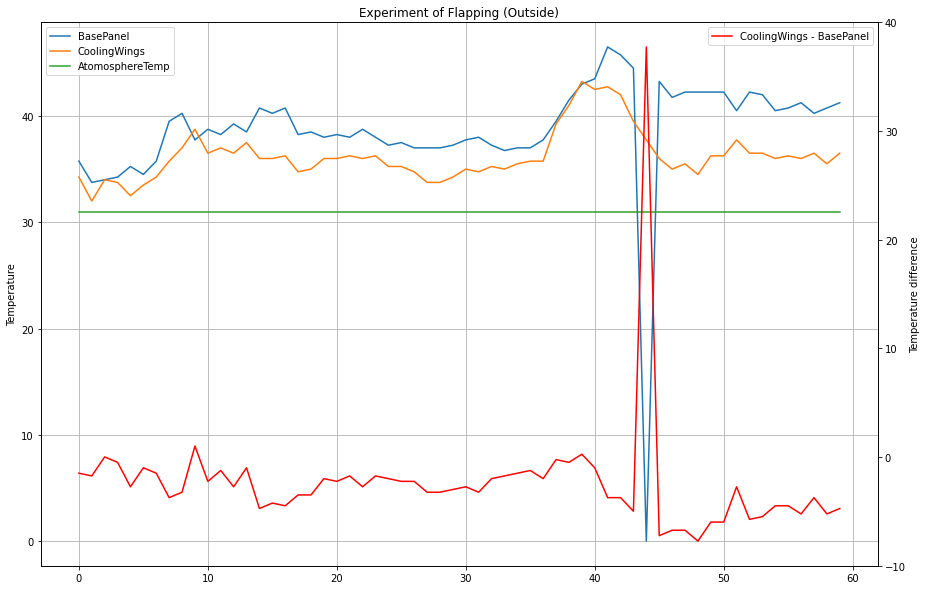

In [14]:
ploting(60,dataframe_list[3],columns,title[counting_flag],atomos = True)
counting_flag += 1

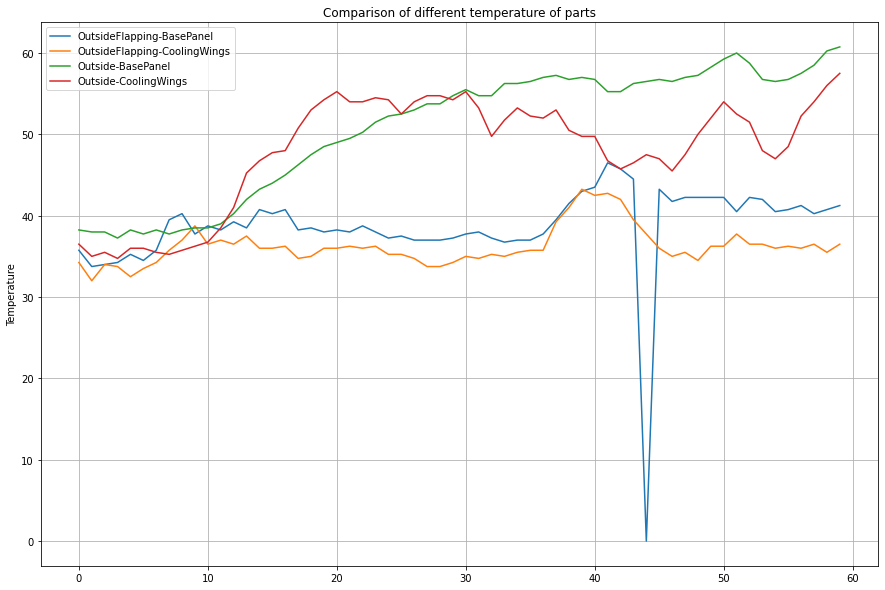

In [15]:
plt.figure(figsize = (15,10))
plt.plot(range(60),dataframe_list[3][columns[0]],label = "OutsideFlapping-BasePanel")
plt.plot(range(60),dataframe_list[3][columns[1]],label = "OutsideFlapping-CoolingWings")
plt.plot(range(60),dataframe_list[2][columns[0]],label = "Outside-BasePanel")
plt.plot(range(60),dataframe_list[2][columns[1]],label = "Outside-CoolingWings")
plt.ylabel('Temperature')
plt.title(title[counting_flag])
plt.legend()
plt.grid()
plt.show()
counting_flag += 1

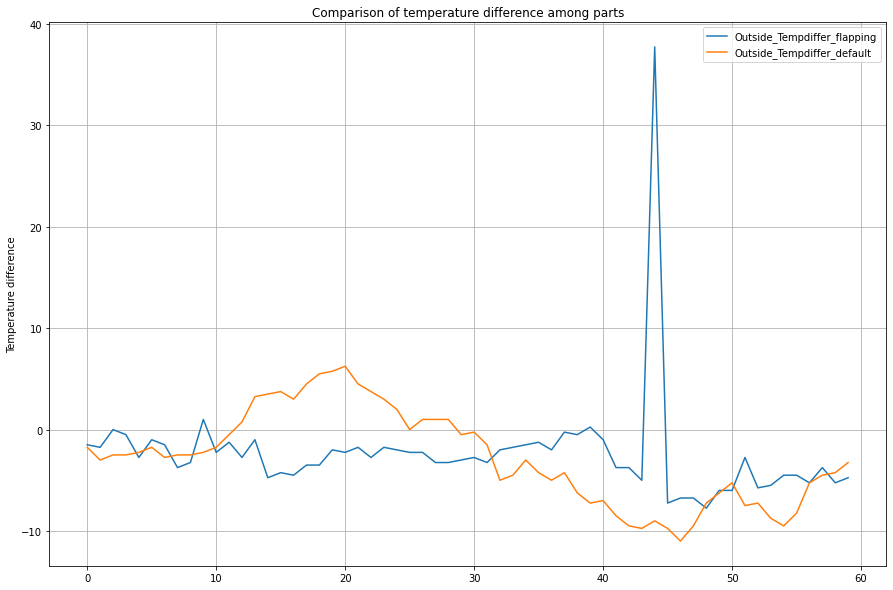

In [16]:
plt.figure(figsize = (15,10))
plt.plot(range(60),dataframe_list[3]['differ'],label = "Outside_Tempdiffer_flapping")
plt.plot(range(60),dataframe_list[2]['differ'],label = "Outside_Tempdiffer_default")
plt.ylabel('Temperature difference')
plt.title(title[counting_flag])
plt.legend()
plt.grid()
plt.show()
counting_flag += 1

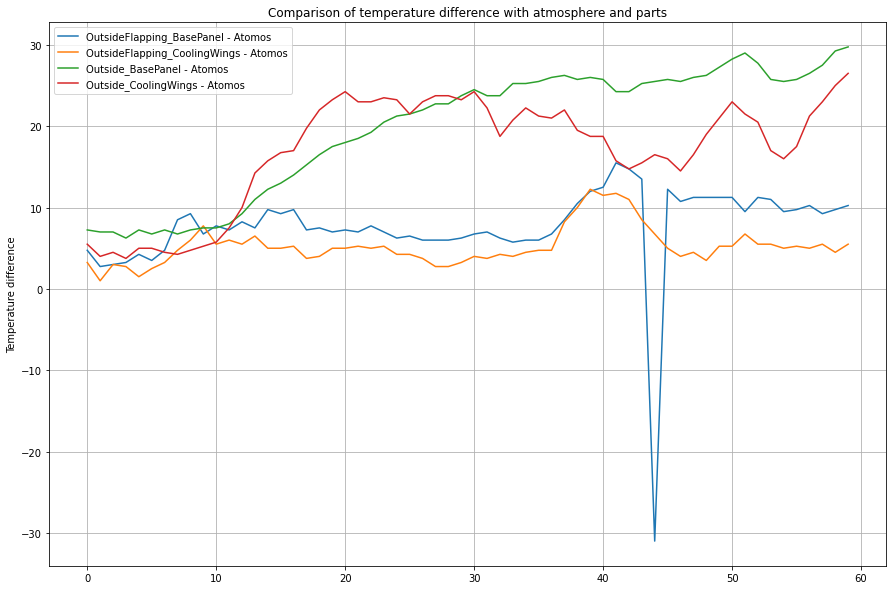

In [17]:
atomosTemp = 31
AtomosTemp = np.ones(60)
for i in range(len(AtomosTemp)):
    AtomosTemp[i] = atomosTemp
plt.figure(figsize = (15,10))
plt.plot(range(60),dataframe_list[3][columns[0]]-AtomosTemp,label = "OutsideFlapping_BasePanel - Atomos")
plt.plot(range(60),dataframe_list[3][columns[1]]-AtomosTemp,label = "OutsideFlapping_CoolingWings - Atomos")
plt.plot(range(60),dataframe_list[2][columns[0]]-AtomosTemp,label = "Outside_BasePanel - Atomos")
plt.plot(range(60),dataframe_list[2][columns[1]]-AtomosTemp,label = "Outside_CoolingWings - Atomos")
plt.ylabel('Temperature difference')
plt.title(title[counting_flag])
plt.legend()
plt.grid()
plt.show()